Importing the Dependencies

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

Data Collection & Processing

In [41]:

titanic_data = pd.read_csv('train.csv')

In [42]:

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:

titanic_data.shape

(891, 12)

In [44]:

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the Missing values

In [46]:

titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [47]:

titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [48]:

print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [49]:
print(titanic_data['Embarked'].mode()[0])

S


In [50]:

titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [51]:

titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [52]:

titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:

titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visualization

In [54]:
sns.set()

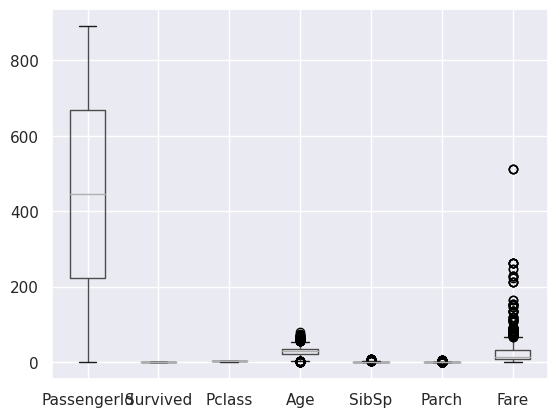

In [55]:
new_df = titanic_data.boxplot()

In [56]:
columns_to_process = ['Age', 'SibSp', 'Parch', 'Fare']



In [57]:
outlier_indices = []

for column_name in columns_to_process:
  Q1 = titanic_data[column_name].quantile(0.25)
  Q3 = titanic_data[column_name].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = titanic_data[(titanic_data[column_name] < lower_bound) | (titanic_data[column_name] > upper_bound)]
  outlier_indices.extend(outliers.index)
titanic_data = titanic_data.drop(outlier_indices)

<Axes: >

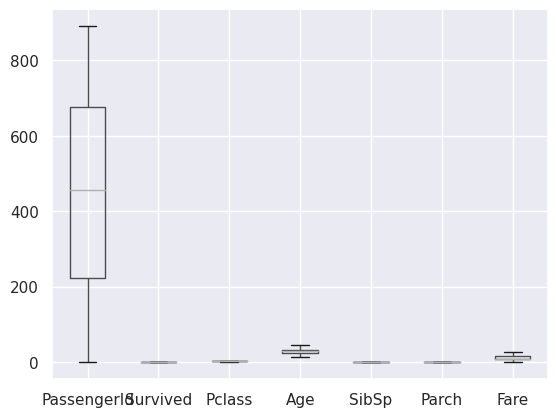

In [58]:
titanic_data.boxplot(showfliers=False)

Encoding the Categorical Columns

In [59]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [60]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,2


Separating features & Target

In [61]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [62]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
5         3    0  29.699118      0      0   8.4583         2
..      ...  ...        ...    ...    ...      ...       ...
884       3    0  25.000000      0      0   7.0500         0
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[577 rows x 7 columns]


In [63]:
print(Y)

0      0
2      1
3      1
4      0
5      0
      ..
884    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 577, dtype: int64


Splitting the data into training data & Test data

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=2)

In [65]:
print(X.shape, X_train.shape, X_test.shape)

(577, 7) (346, 7) (231, 7)


Model Training

Logistic Regression

In [66]:
model = LogisticRegression(solver="liblinear", penalty="l2", C=100)

In [67]:
model.fit(X_train, Y_train)

LogisticRegression(C=100, solver='liblinear')

Model Evaluation

Accuracy Score

In [68]:

X_train_prediction = model.predict(X_train)

In [69]:
print(X_train_prediction)

[0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1]


In [70]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8092485549132948


In [71]:

X_test_prediction = model.predict(X_test)

In [72]:
print(X_test_prediction)

[0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1
 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 1 0]


In [73]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8051948051948052


In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [75]:
print(cross_val_score(model,X,Y,cv=10,scoring="accuracy").mean())

0.7920750151240169


In [76]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       156
           1       0.71      0.67      0.69        75

    accuracy                           0.81       231
   macro avg       0.78      0.77      0.77       231
weighted avg       0.80      0.81      0.80       231



In [77]:
print(roc_auc_score(Y_test,X_test_prediction))

0.7692307692307692


In [78]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


c_space = np.logspace(-5, 8, 15)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
param_grid = {'C': c_space, 'solver':solvers,'penalty':penalty}




logreg = LogisticRegression()


logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

logreg_cv.fit(X, Y)


print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.4393970560760795, 'penalty': 'l1', 'solver': 'liblinear'}
Best score is 0.7972863568215892
